# Analyse results from simple load test

Make some basic sanity plots from the results produced by running `python scripts/load-test.py fboylu/binder --n-launches 20 --filepath=00_DevelopModel.ipynb`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

import pickle

In [3]:
with open('../results.pkl', 'rb') as f:
    data = pickle.load(f)
    records = data['results']
    gun_time = data['gun_time']

In [4]:
df = pd.DataFrame.from_records(records, index='idx')

In [5]:
df.head()

,end,kernel,notebook,ready,start,status,widgets
idx,,,,,,,
1,1.530828e+09,1.530828e+09,1.530828e+09,1.530828e+09,1.530828e+09,success,1.530828e+09
4,1.530828e+09,1.530828e+09,1.530828e+09,1.530828e+09,1.530828e+09,success,1.530828e+09
0,1.530828e+09,1.530828e+09,1.530828e+09,1.530828e+09,1.530828e+09,success,1.530828e+09
7,1.530828e+09,1.530828e+09,1.530828e+09,1.530828e+09,1.530828e+09,success,1.530828e+09
2,1.530828e+09,1.530828e+09,1.530828e+09,1.530828e+09,1.530828e+09,success,1.530828e+09


In [6]:
# time for successful launches
df_sucess = df[df.status == 'success']

In [7]:
df_sucess['total'] = df['end'] - df['start']

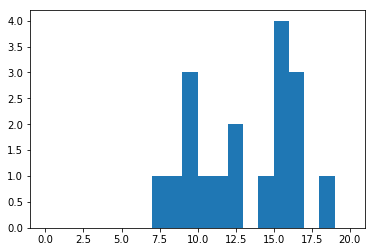

In [8]:
# launch times
plt.hist(df_sucess.total, range=(0, 20), bins=20);

In [9]:
from collections import Counter

In [10]:
# how many failures?
Counter(df['status'])

Counter({'success': 20})

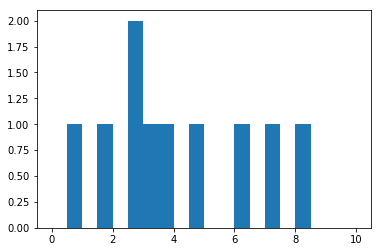

In [11]:
# launch delays/spread, should be between 0 and 10s
plt.hist(df['start'] - gun_time, bins=20, range=(0,10));